In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pickle-war-dataset/dataframe.pkl
/kaggle/input/dtm-pickle/dtm.pkl


In [2]:
import pickle

# Load the preprocessed data from the pickle file
with open('/kaggle/input/pickle-war-dataset/dataframe.pkl', 'rb') as f:
    tweets = pickle.load(f)


In [3]:
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh,tokenized_review,clean_content
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,2022-03-05,is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,1500259722112520194,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine,"[is, that, the, same, expensive, and, ineffect...",is that the same expensive and ineffective bor...
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,2022-03-05,so the americans are dressing up as russ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,1500259491232641025,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,2,...,1.500251e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine,"[so, the, americans, are, dressing, up, as, ru...",so the americans are dressing up as russians c...
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,2022-03-05,maybe if one military unit from ukraine crosse...,Maybe if one military unit from Ukraine crosse...,1500259115863777280,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine,"[maybe, if, one, military, unit, from, ukraine...",maybe if one military unit from ukraine crosse...
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,2022-03-05,volunteers cross polish border into ukraine to...,Volunteers cross Polish border into Ukraine to...,1500258740423086083,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russian border Ukraine,"[volunteers, cross, polish, border, into, ukra...",volunteers cross polish border into ukraine to...
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,2022-03-05,but theres no russian aircraft flying nea...,@MarkHertling BUT... theres no Russian aircraf...,1500258434414874625,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,4,...,1.500223e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russian border Ukraine,"[but, theres, no, russian, aircraft, flying, n...",but theres no russian aircraft flying near lvi...


In [4]:
corpus = tweets[['content']].copy()

# Display the corpus
print("Corpus:")
print(corpus)

Corpus:
                                                  content
0       is that the same expensive and ineffective bor...
1             so the americans are dressing up as russ...
2       maybe if one military unit from ukraine crosse...
3       volunteers cross polish border into ukraine to...
4         but    theres no russian aircraft flying nea...
...                                                   ...
284659  rusia wants to take back ukraine  they are our...
284660  a positive for russia is that  according to us...
284661      resists  further invades  because already ...
284662      i fully support ukraine s sovereignty  but...
284663  biden warns putin   what does acting decisivel...

[272482 rows x 1 columns]


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df1 is your DataFrame with more than 100 entries
# Sample data (assuming df1 is your DataFrame)
df1_sample = tweets.head(1000)  # Selecting the first 100 entries

# Step 1: Create a CountVectorizer object
cv = CountVectorizer(stop_words='english')

# Step 2: Fit and transform the data to create the document-term matrix
data_cv = cv.fit_transform(df1_sample['content'])

# Step 3: Convert the document-term matrix to a DataFrame
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Display the document-term matrix
print(data_dtm)


     aa  abandoned  abhinandan  ability  able  abm  abortion  absolute  \
0     0          0           0        0     0    0         0         0   
1     0          0           0        0     0    0         0         0   
2     0          0           0        0     0    0         0         0   
3     0          0           0        0     0    0         0         0   
4     0          0           0        0     0    0         0         0   
..   ..        ...         ...      ...   ...  ...       ...       ...   
995   0          0           0        0     0    0         0         0   
996   0          0           0        0     0    0         0         0   
997   0          0           0        0     0    0         0         0   
998   0          0           0        0     0    0         0         0   
999   0          0           0        0     0    0         0         0   

     absolutely  absorbed  ...  zelenksy  zelensky  zelenskyy  zhytomyr  \
0             0         0  ...      

In [6]:
# Create a CountVectorizer object with specified parameters
cv = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.1, max_df=0.8)

# Fit and transform the data to create the document-term matrix
data_cv = cv.fit_transform(corpus['content'])

# Convert the document-term matrix to a DataFrame
data_dtm2 = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Display the document-term matrix
print(data_dtm2)

        border  nato  putin  russia  russian  war  war ukraine
0            1     0      0       0        1    0            0
1            1     0      0       0        3    0            0
2            1     0      1       0        1    0            0
3            1     0      0       0        1    0            0
4            1     0      0       1        1    0            0
...        ...   ...    ...     ...      ...  ...          ...
272477       0     0      0       0        0    1            0
272478       0     0      1       1        0    1            0
272479       0     0      0       1        0    1            1
272480       0     0      0       2        0    1            0
272481       0     0      2       1        0    1            1

[272482 rows x 7 columns]


In [7]:
print(data_dtm.shape) 
print(data_dtm2.shape)

(1000, 4502)
(272482, 7)


In [8]:
import pickle

# Load the preprocessed data from the pickle file
with open('/kaggle/input/dtm-pickle/dtm.pkl', 'rb') as f:
    tweets1 = pickle.load(f)


In [9]:
tweets1= tweets1.transpose()
tweets1.head()

,0,1,2,3,4,5,6,7,8,9,...,272472,272473,272474,272475,272476,272477,272478,272479,272480,272481
border,1,1,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
russia,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2,1
russian,1,3,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
war,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


**Word Cloud for entire data**

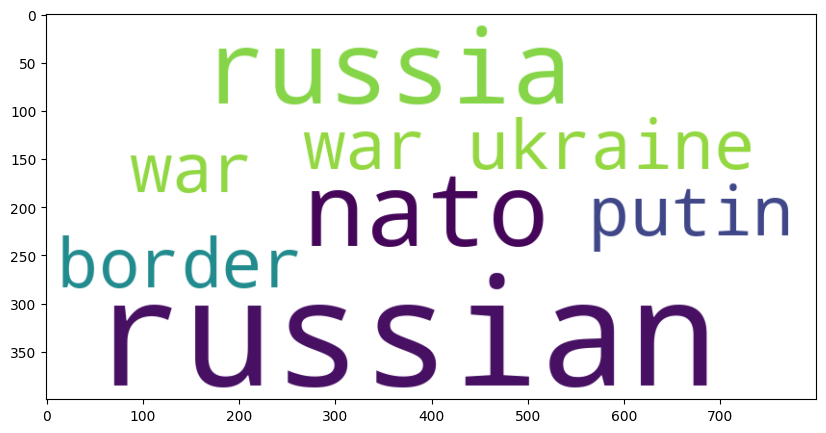

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the document-term matrix to a dictionary of word frequencies
word_freq = dict(zip(cv.get_feature_names_out(), data_dtm.sum(axis=0)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()


**Average length of tweets and average word count of tweets**

In [11]:
# Calculate text length and word count for each tweet
tweets['text_len'] = tweets['content'].astype(str).apply(len)
tweets['text_word_count'] = tweets['content'].apply(lambda x: len(str(x).split()))

# Print average length of tweets and average word counts of tweets
print("Average length of tweets:", round(tweets['text_len'].mean()))
print("Average word count of tweets:", round(tweets['text_word_count'].mean()))


Average length of tweets: 186
Average word count of tweets: 32


**Top 50 tweets with maximum number of retweets**

In [12]:
#Top 50 tweets with maximum numbers of retweets
# Sort the tweets by 'retweetCount' in descending order and drop duplicate tweets
top_retweeted_tweets = tweets.sort_values('retweetCount', ascending=False)['content'].drop_duplicates().head(50)

# Print the top 50 retweeted tweets
print(top_retweeted_tweets)


56256     talked to    i m grateful to him for supportin...
3110      worrying reports  russians might have pointed ...
4357      ukraine says it will give russian soldiers tak...
6466      breaking  iconic spanish chef jos  andr s flie...
79529     breaking  russian billionaires mikhail fridman...
63961     russia invaded ukraine a week ago  i took this...
66999     the audacity of international media saying bra...
29581     the kremlin and its surrogates are asking you ...
203049    nice of the media to take a break from startin...
24997     no  ukraine did not    attack donetsk or luhan...
9075      breaking  senator tim kaine on msnbc just now ...
156238    russia  we aren t going to invade ukraine    u...
246717    ukraine is not our country and not our problem...
69375     conservatives accepted    from russia linked d...
56640         ukrainians join territorial defense forces...
246198    that s because joe biden is protecting his fam...
92475     war is always wrong  i m think

**Sorting the tweets based on retweet count**

In [13]:
#Sorting the Tweets based on Retweet count
# Sort the DataFrame by 'retweetcount' column in descending order
sorted_tweets = tweets[['user', 'content', 'retweetCount', 'id']].sort_values(by='retweetCount', ascending=False)

# Display the sorted DataFrame
print(sorted_tweets)


                                                     user  \
56256   {'_type': 'snscrape.modules.twitter.User', 'us...   
3110    {'_type': 'snscrape.modules.twitter.User', 'us...   
4357    {'_type': 'snscrape.modules.twitter.User', 'us...   
6466    {'_type': 'snscrape.modules.twitter.User', 'us...   
79529   {'_type': 'snscrape.modules.twitter.User', 'us...   
...                                                   ...   
108223  {'_type': 'snscrape.modules.twitter.User', 'us...   
108224  {'_type': 'snscrape.modules.twitter.User', 'us...   
108226  {'_type': 'snscrape.modules.twitter.User', 'us...   
108227  {'_type': 'snscrape.modules.twitter.User', 'us...   
284663  {'_type': 'snscrape.modules.twitter.User', 'us...   

                                                  content  retweetCount  \
56256   talked to    i m grateful to him for supportin...         24134   
3110    worrying reports  russians might have pointed ...         20660   
4357    ukraine says it will give russian 

**most retweeted tweet**

In [14]:
#most retweeted tweet
# Get the most retweeted tweet from the sorted DataFrame
most_retweeted = sorted_tweets.iloc[0]

# Print the text of the most retweeted tweet
print(most_retweeted['content'])


talked to    i m grateful to him for supporting ukraine with words and deeds  next week we will receive another batch of starlink systems for destroyed cities  discussed possible space projects    but i ll talk about this after the war 


**TOP 50 WORDS IN THE DATASET**

In [15]:
# Sum the frequencies of each word across all documents
word_freq = data_dtm.sum(axis=0)

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(word_freq, columns=['frequency'])

# Sort the DataFrame by word frequencies in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Take the top 50 words
top_50_words = word_freq_df.head(50)

# Display the top 50 words
print(top_50_words)


            frequency
ukraine          1243
russian          1143
border           1075
russia            401
nato              397
putin             210
war               144
amp               129
forces            124
troops            118
people            105
ukrainian          97
poland             93
military           89
near               74
polish             73
invasion           73
want               70
just               66
countries          66
cross              60
fight              59
did                59
country            58
stop               52
army               51
right              50
weapons            50
know               49
russians           48
think              48
like               45
students           45
western            43
missiles           43
usa                42
eastern            41
biden              41
don                40
state              40
does               40
say                39
close              38
soldiers           37
ukrainians

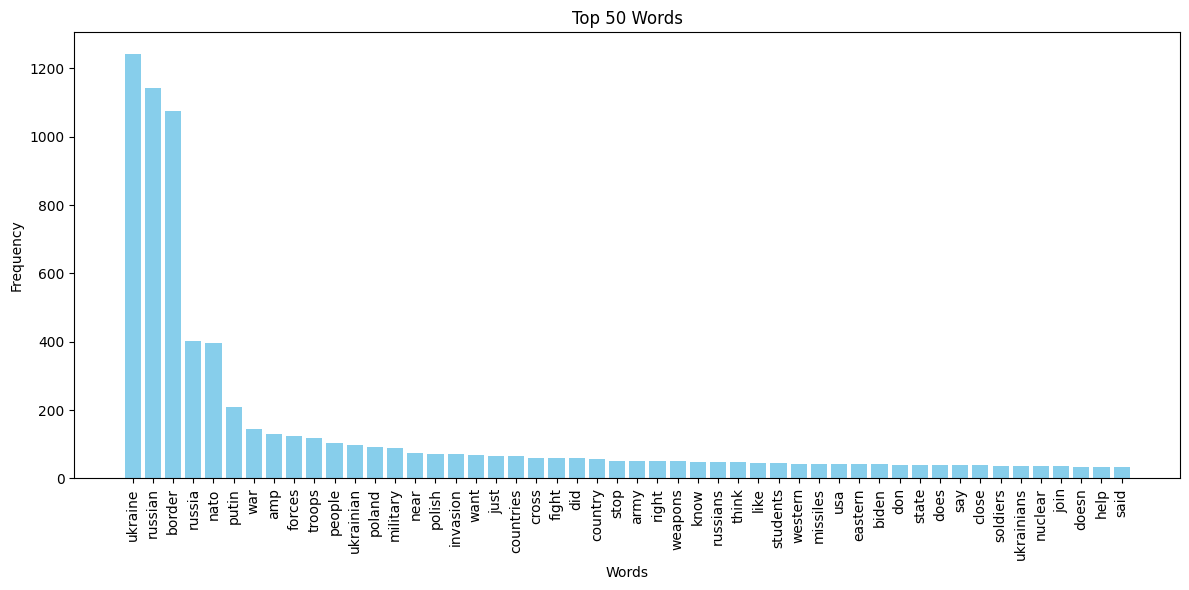

In [16]:
import matplotlib.pyplot as plt

# Assuming top_50_words is your DataFrame containing the top 30 words and their frequencies
# If you've already run the code you provided, you can directly use top_30_words variable

# Plot the top 50 words as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_50_words.index, top_50_words['frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


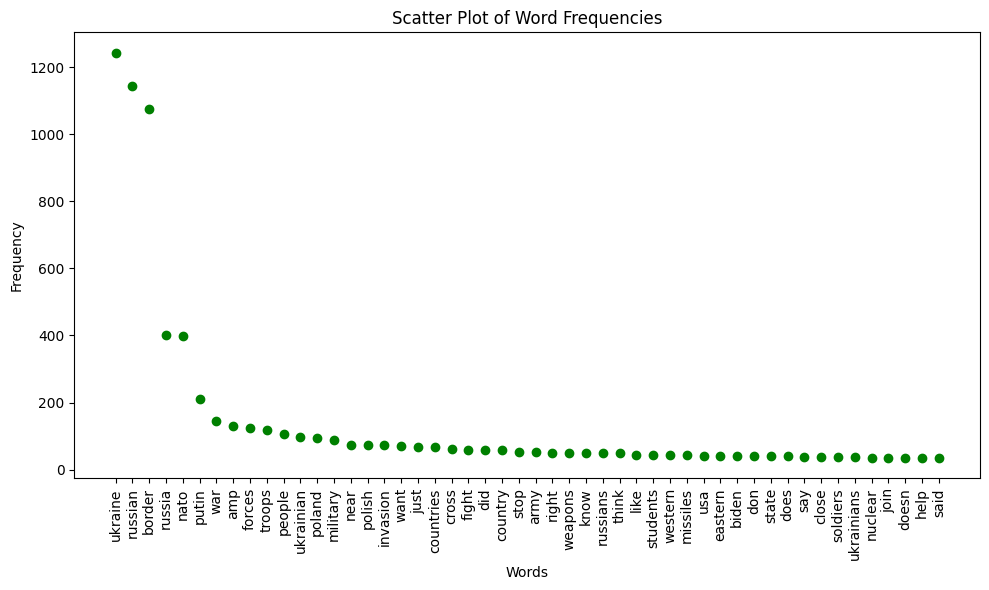

In [17]:
import matplotlib.pyplot as plt

# Assuming top_50_words is your DataFrame containing the top 50 words and their frequencies
# If you've already run the code you provided, you can directly use top_50_words variable

# Plot the scatter plot of word frequencies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_50_words)), top_50_words['frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Word Frequencies')
plt.xticks(range(len(top_50_words)), top_50_words.index, rotation=90)
plt.tight_layout()
plt.show()




In [18]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


**SENTIMENT SCORE CALCULATION**

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create lists to store sentiment scores
scores = []

# Iterate over each tweet in the 'content' column
for content in tweets['content']:
    # Perform sentiment analysis on the tweet
    sentiment_scores = analyzer.polarity_scores(content)
    
    # Extract sentiment scores
    compound = sentiment_scores["compound"]
    pos = sentiment_scores["pos"]
    neu = sentiment_scores["neu"]
    neg = sentiment_scores["neg"]
    
    # Append the scores to the list
    scores.append({"Compound": compound,
                   "Positive": pos,
                   "Negative": neg,
                   "Neutral": neu
                  })

# Convert the list of scores into a DataFrame
sentiments_score = pd.DataFrame(scores)

# Join the DataFrame of sentiment scores with the original DataFrame
tweets = pd.concat([tweets, sentiments_score], axis=1)
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,Searh,tokenized_review,clean_content,text_len,text_word_count,Compound,Positive,Negative,Neutral
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,2022-03-05,is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,1.500260e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,0.0,1.0,...,NaN,Russian border Ukraine,"[is, that, the, same, expensive, and, ineffect...",is that the same expensive and ineffective bor...,202.0,32.0,-0.4404,0.00,0.115,0.885
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,2022-03-05,so the americans are dressing up as russ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",1.0,0.0,2.0,...,NaN,Russian border Ukraine,"[so, the, americans, are, dressing, up, as, ru...",so the americans are dressing up as russians c...,166.0,28.0,0.0000,0.00,0.000,1.000
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,2022-03-05,maybe if one military unit from ukraine crosse...,Maybe if one military unit from Ukraine crosse...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,0.0,0.0,...,NaN,Russian border Ukraine,"[maybe, if, one, military, unit, from, ukraine...",maybe if one military unit from ukraine crosse...,110.0,19.0,-0.2960,0.00,0.115,0.885
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,2022-03-05,volunteers cross polish border into ukraine to...,Volunteers cross Polish border into Ukraine to...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,1.0,2.0,...,NaN,Russian border Ukraine,"[volunteers, cross, polish, border, into, ukra...",volunteers cross polish border into ukraine to...,69.0,10.0,-0.3818,0.00,0.224,0.776
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,2022-03-05,but theres no russian aircraft flying nea...,@MarkHertling BUT... theres no Russian aircraf...,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,1.0,4.0,...,NaN,Russian border Ukraine,"[but, theres, no, russian, aircraft, flying, n...",but theres no russian aircraft flying near lvi...,270.0,47.0,-0.8924,0.06,0.259,0.681


In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

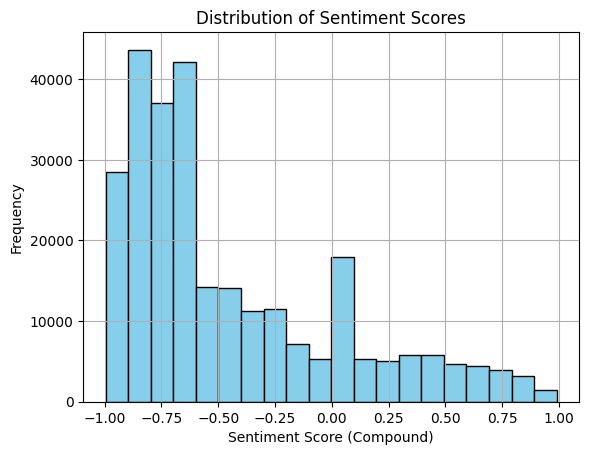

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.hist(tweets['Compound'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [22]:
# Create a list of conditions
conditions = [
    (tweets['Compound'] <= -0.5),
    (tweets['Compound'] > -0.5) & (tweets['Compound'] < 0.5),
    (tweets['Compound'] > 0.5)
]

# Create a list of values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' and use np.select to assign values based on conditions
tweets['Category'] = np.select(conditions, values)

**Wordcloud of positive negative and neutral sentiments**

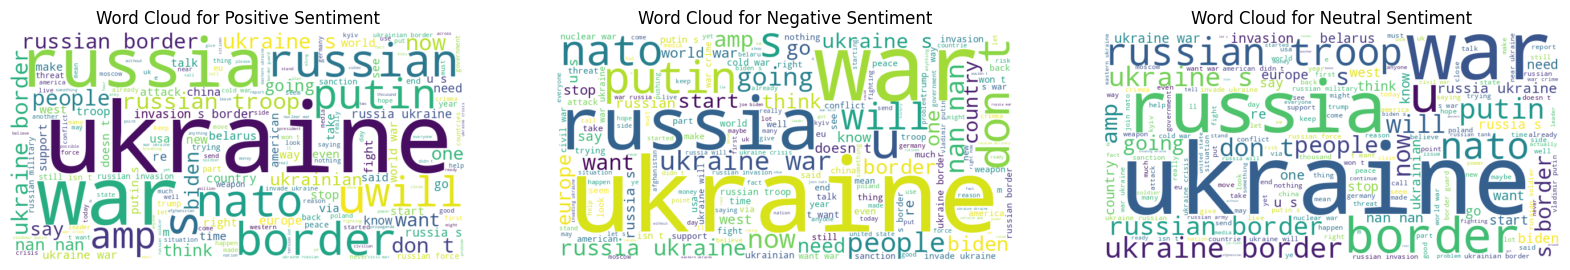

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets DataFrame for positive, negative, and neutral sentiments
positive_tweets = tweets[tweets['Category'] == 'Positive'].copy()
negative_tweets = tweets[tweets['Category'] == 'Negative'].copy()
neutral_tweets = tweets[tweets['Category'] == 'Neutral'].copy()

# Convert 'content' column to strings and drop any NaN values
positive_tweets['content'] = positive_tweets['content'].astype(str)
negative_tweets['content'] = negative_tweets['content'].astype(str)
neutral_tweets['content'] = neutral_tweets['content'].astype(str)

# Concatenate all positive, negative, and neutral tweets into single strings
positive_text = ' '.join(positive_tweets['content'])
negative_text = ' '.join(negative_tweets['content'])
neutral_text = ' '.join(neutral_tweets['content'])

# Generate word clouds for positive, negative, and neutral sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the word clouds
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

plt.show()


**Top 30 words for positive sentiments**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'positive_tweets' and 'negative_tweets' are DataFrames containing tweets for positive and negative sentiments respectively

# Initialize CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=30)

# Fit and transform positive tweets
positive_data_dtm = cv.fit_transform(positive_tweets['content'])

# Convert positive data to DataFrame
positive_data_dtm_df = pd.DataFrame(positive_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for positive sentiment
top_30_positive_words = positive_data_dtm_df.sum().sort_values(ascending=False)


# Print top 30 words for positive sentiment
print("Top 30 words for Positive Sentiment:")
print(top_30_positive_words)



Top 30 words for Positive Sentiment:
ukraine      18983
war          12442
russia        7749
russian       7577
border        6430
putin         3335
nato          2940
troops        2255
amp           1558
biden         1519
people        1416
just          1297
military      1281
world         1206
invasion      1169
ukrainian     1164
want          1101
don           1035
like          1017
country        851
forces         831
president      803
going          795
europe         755
think          738
stop           694
nan            669
belarus        659
near           644
know           638
dtype: int64


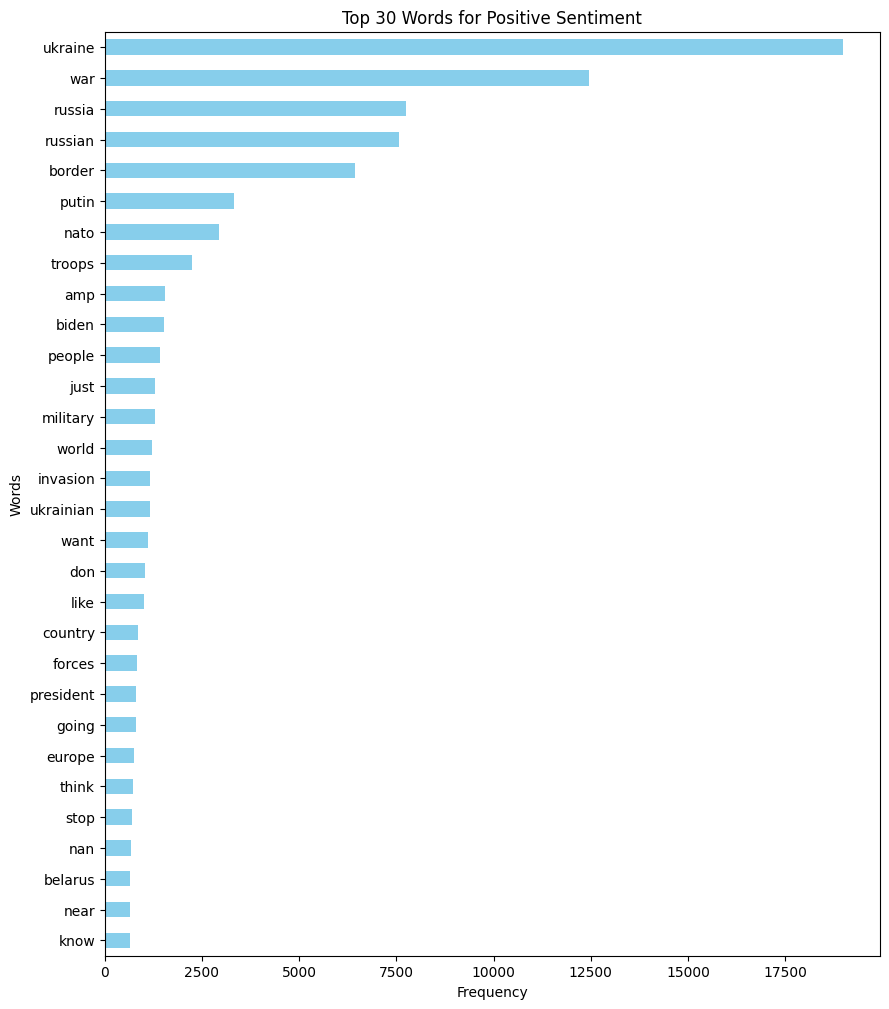

In [25]:
import matplotlib.pyplot as plt

# Plot the top 30 words for positive sentiment
plt.figure(figsize=(10, 12))
top_30_positive_words.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 Words for Positive Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**Top 30 words for negative sentiments**

In [26]:
# Fit and transform negative tweets
negative_data_dtm = cv.fit_transform(negative_tweets['content'])

# Convert negative data to DataFrame
negative_data_dtm_df = pd.DataFrame(negative_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for negative sentiment
top_30_negative_words = negative_data_dtm_df.sum().sort_values(ascending=False)
# Print top 30 words for negative sentiment
print("\nTop 30 words for Negative Sentiment:")
print(top_30_negative_words)




Top 30 words for Negative Sentiment:
ukraine      178315
war          159435
russia        83503
russian       33583
putin         30748
nato          24571
border        20275
biden         16753
amp           15672
people        13803
world         13765
just          12781
want          12473
troops        11865
don           11249
like          10980
going         10210
military       8631
europe         8520
invasion       8356
country        7772
think          7766
nan            7667
stop           7371
start          6884
president      6778
ukrainian      6758
wants          6447
know           6216
invade         5949
dtype: int64


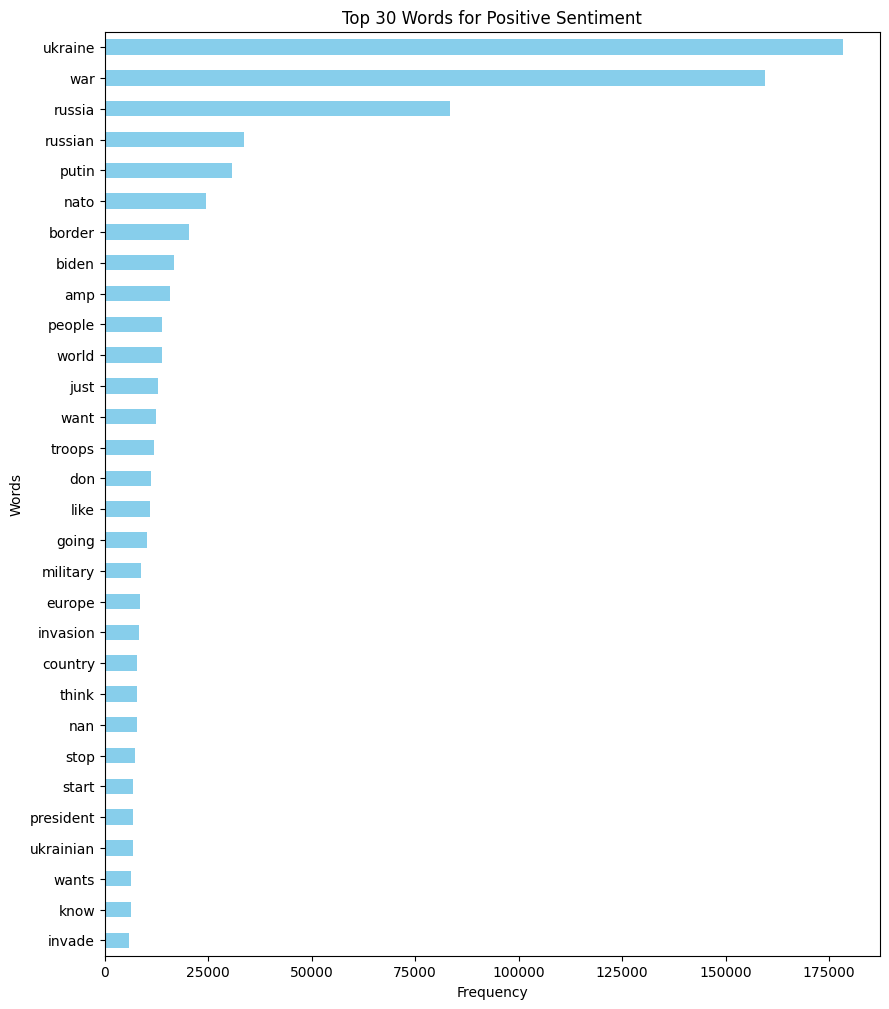

In [27]:
import matplotlib.pyplot as plt

# Plot the top 30 words for positive sentiment
plt.figure(figsize=(10, 12))
top_30_negative_words.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 Words for Positive Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**Top 30 words for neutral sentiments**

In [28]:
# Assuming 'neutral_tweets' is a DataFrame containing tweets for neutral sentiment

# Fit and transform neutral tweets
neutral_data_dtm = cv.fit_transform(neutral_tweets['content'])

# Convert neutral data to DataFrame
neutral_data_dtm_df = pd.DataFrame(neutral_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for neutral sentiment
top_30_neutral_words = neutral_data_dtm_df.sum().sort_values(ascending=False)

# Print top 30 words for neutral sentiment
print("\nTop 30 words for Neutral Sentiment:")
print(top_30_neutral_words)



Top 30 words for Neutral Sentiment:
ukraine      100616
war           61817
russian       43239
russia        41211
border        37283
putin         16661
nato          15272
troops        14052
amp            8583
biden          7963
military       7248
just           6813
people         6786
ukrainian      6290
world          6141
invasion       6031
want           5640
like           5295
don            5208
forces         4782
going          4540
country        4238
president      4181
europe         4156
belarus        3801
think          3740
says           3731
near           3651
stop           3515
said           3318
dtype: int64


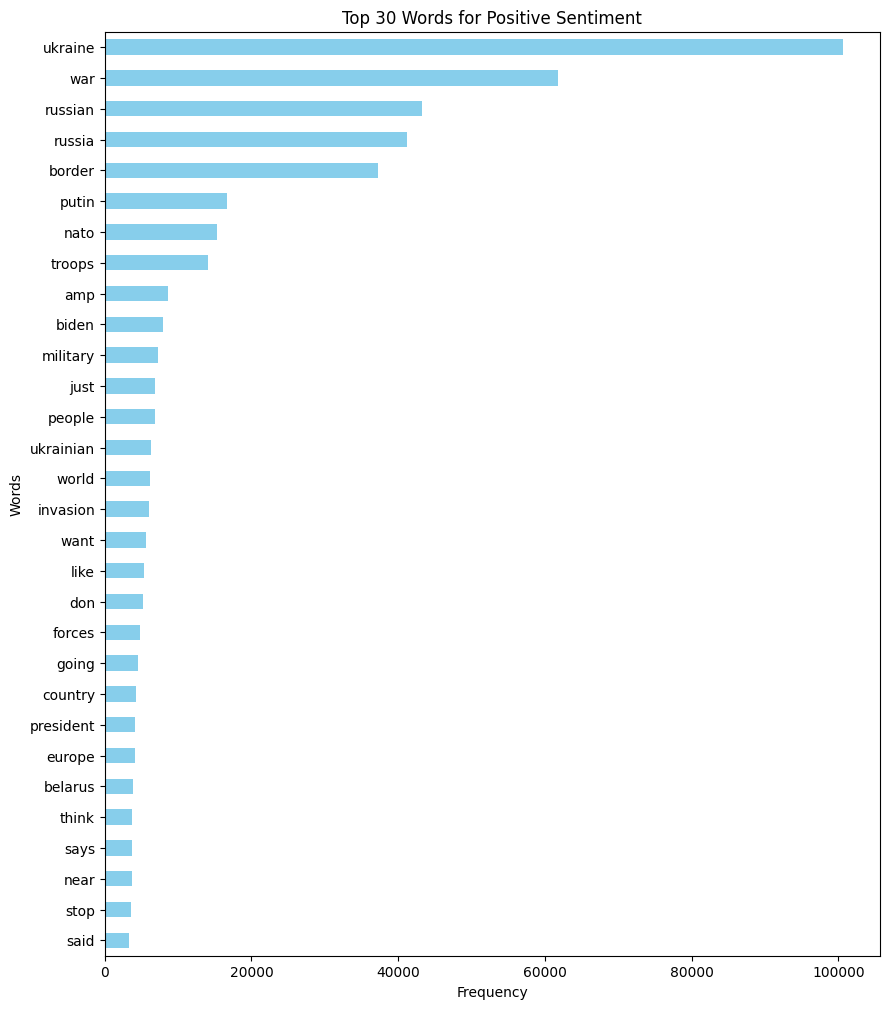

In [29]:
import matplotlib.pyplot as plt

# Plot the top 30 words for positive sentiment
plt.figure(figsize=(10, 12))
top_30_neutral_words.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 30 Words for Positive Sentiment')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**Count of Positive,Negative and Neutral tweets**

In [30]:
category_counts = pd.DataFrame(tweets.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts / x.Counts.sum()) * 100)

print(category_counts)

          Counts  Percentage
Category                    
0          11545    4.064826
Negative  165598   58.304638
Neutral    89776   31.608819
Positive   17103    6.021717


In [31]:
# Filter out tweets with '0' category
tweets_filtered = tweets[tweets['Category'] != '0']

# Calculate the count and percentage again after removing '0' category
count = tweets_filtered['Category'].value_counts()
percentage = (tweets_filtered['Category'].value_counts() / len(tweets_filtered)) * 100

# Display the count and percentage
result = pd.concat([count, percentage], axis=1)
result.columns = ['Count', 'Percentage']
print(result)

           Count  Percentage
Category                    
Negative  165598   60.775038
Neutral    89776   32.948102
Positive   17103    6.276860


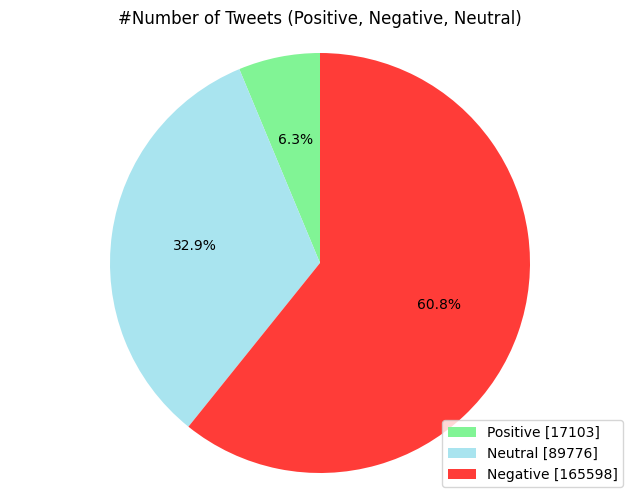

In [32]:
import matplotlib.pyplot as plt

# Counts of positive, neutral, and negative tweets
positive = 17103
neutral = 89776
negative = 165598

# Creating PieChart
labels = ['Positive [' + str(positive) + ']', 'Neutral [' + str(neutral) + ']', 'Negative [' + str(negative) + ']']
sizes = [positive, neutral, negative]
colors = ["#81F495", "#A9E4EF", "#FF3C38"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(labels)
plt.title('#Number of Tweets (Positive, Negative, Neutral)')
plt.axis('equal')
plt.show()